<a href="https://colab.research.google.com/github/gadilshina-ve/BDP_MGPU/blob/main/LW_02/LW_2_Gadilshina_VE_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 2. Парсинг HTML. XPath+Selenium

## **Вариант 16. Гадильшина Валентина Евгеньевна, БД-231м**

**Цель работы:** научиться извлекать данные из HTML-страниц с использованием XPath.
Практически применить навыки парсинга для сбора данных с веб-страниц.

**Оборудование и ПО:**
* Компьютер с доступом в интернет.
* Интерпретатор Python.
* Библиотеки: requests, lxml, BeautifulSoup.

**Теоретическая часть**

XPath (XML Path Language) — это язык запросов, который используется для выбора узлов из
XML-документов. Он также используется для навигации по HTML-страницам.


**Тема:** Анализ данных о последних изменениях в банковских ставках в США с сайта  Bank of America и Federal Reserve Bank

URL: https://www.bankofamerica.com/

URL: https://fred.stlouisfed.org/


### Ход работы:

In [1]:
#1. Импорт необходимых библиотек:

import requests
from lxml import html
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#2. Отправка GET-запроса к целевому URL:

url = 'https://www.bankofamerica.com/mortgage/mortgage-rates/'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
response = requests.get(url, headers=headers)
if response.status_code == 200:
 page_content = response.content
else:
 print(f"Ошибка при получении страницы: {response.status_code}")
 exit()

In [3]:
#3. Парсинг HTML-страницы с использованием lxml:

tree = html.fromstring(page_content)
tree

<Element html at 0x7cca35ecbec0>

In [4]:
#4. Использование XPath для извлечения данных.

# Извлечение типов сроков ипотеки
mortgage_types = tree.xpath('//div[contains(@class, "row grayscaletrue")]/@data-product-name')
# Извлечение процентных ставок
interest_rates = tree.xpath('//div[contains(@class, "row grayscaletrue")]/following-sibling::div[1]//a/text()')
# Извлечение APR
apr_rates = tree.xpath('//div[contains(@class, "row grayscaletrue")]/following-sibling::div[2]//a/text()')

In [5]:
# Приведение данных к одинаковой длине для формирования DataFrame
min_length = min(len(mortgage_types), len(interest_rates), len(apr_rates))

In [6]:
#5. Создание DataFrame.

data = {
    'Term': mortgage_types[:min_length],
    'Rate': interest_rates[:min_length],
    'APR': apr_rates[:min_length]
}
df = pd.DataFrame(data)
df

,Term,Rate,APR
0,Fixed 30 Years,fixed,fixed
1,Fixed 15 Years,ARM,ARM
2,"ARM Fixed First 7 Years, Then Adjusts Every 6 ...",About ARM rates,About ARM rates
3,Fixed 20 Years,ARM,ARM
4,"ARM Fixed First 10 Years, Then Adjusts Every 6...",About ARM rates,About ARM rates
5,"ARM Fixed First 5 Years, Then Adjusts Every 6 ...",fixed,ARM


**Получились странные данные, поэтому взяла другой сайт https://fred.stlouisfed.org/ , который содержит исторические данные по ставкаам с 1955 года по сентябрь 2024 года**

In [7]:
#2. Отправка GET-запроса к целевому URL:

url = 'https://fred.stlouisfed.org/data/PRIME'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
response = requests.get(url, headers=headers)
if response.status_code == 200:
 page_content = response.content
else:
 print(f"Ошибка при получении страницы: {response.status_code}")
 exit()

In [8]:
#3. Парсинг HTML-страницы с использованием lxml:

tree = html.fromstring(page_content)
tree

<Element html at 0x7cca35d70e00>

In [9]:
#4. Использование XPath для извлечения данных.

#XPath для извлечения дат
dates = tree.xpath('//table[@id="data-table-observations"]/tbody/tr/th[@scope="row"]/text()')

#XPath для извлечения значений
values = tree.xpath('//table[@id="data-table-observations"]/tbody/tr/td/text()')

In [10]:
#5. Создание DataFrame.

data = {
 'Dates': dates,
 'Rate': values
}
df = pd.DataFrame(data)
df

,Dates,Rate
0,1955-08-04,3.25
1,1955-10-14,3.50
2,1956-04-13,3.75
3,1956-08-21,4.00
4,1957-08-06,4.50
...,...,...
354,2023-02-02,7.75
355,2023-03-23,8.00
356,2023-05-04,8.25
357,2023-07-27,8.50


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Dates   359 non-null    object
 1   Rate    359 non-null    object
dtypes: object(2)
memory usage: 5.7+ KB


In [12]:
#6. Предобработка данных.

# Преобразуем значения Dates в формат datetime для удобства работы с датами.
df['Dates'] = pd.to_datetime(df['Dates'])

# Преобразуем значения Rate в числовой формат, чтобы можно было выполнять математические операции.
df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce')

In [13]:
# Проверка на пропущенные значения
print(df.isnull().sum())

Dates    0
Rate     0
dtype: int64


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Dates   359 non-null    datetime64[ns]
 1   Rate    359 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.7 KB


In [15]:
#7. Анализ данных.
print(df.describe())

                               Dates        Rate
count                            359  359.000000
mean   1984-12-12 11:25:54.317548736    9.785515
min              1955-08-04 00:00:00    3.250000
25%              1974-11-19 00:00:00    6.500000
50%              1980-10-01 00:00:00    8.500000
75%              1991-03-19 00:00:00   12.000000
max              2024-09-19 00:00:00   21.500000
std                              NaN    4.431031


In [16]:
# Дата и значение максимальной ставки
max_rate_index = df['Rate'].idxmax()
max_rate_date = df.loc[max_rate_index, 'Dates']
max_rate_value = df.loc[max_rate_index, 'Rate']

print(f"Максимальная ставка: {max_rate_value}% на дату {max_rate_date}")

Максимальная ставка: 21.5% на дату 1980-12-19 00:00:00


In [17]:
# Дата и значение минимальной ставки
min_rate_index = df['Rate'].idxmin()
min_rate_date = df.loc[min_rate_index, 'Dates']
min_rate_value = df.loc[min_rate_index, 'Rate']

print(f"Минимальная ставка: {min_rate_value}% на дату {min_rate_date}")

Минимальная ставка: 3.25% на дату 1955-08-04 00:00:00


In [18]:
# Cредняя ставка за разные десятилетия
df['Decade'] = df['Dates'].dt.year // 10 * 10
average_rates = df.groupby('Decade')['Rate'].mean()
average_rates

,Rate
Decade,
1950,4.000000
1960,6.200000
1970,8.816406
1980,14.539823
1990,8.052083
2000,6.354651
2010,4.625000
2020,6.178571


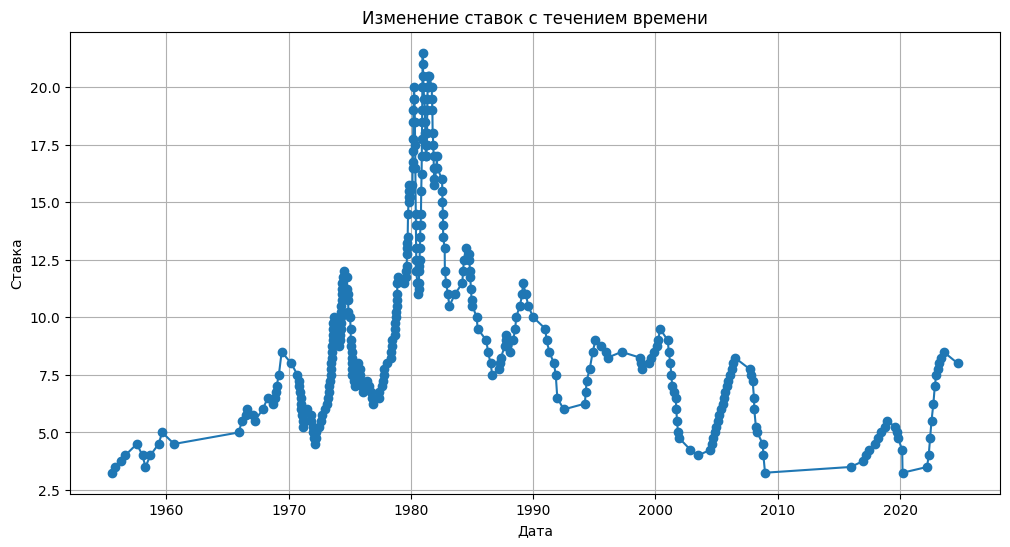

In [19]:
#8. Визуализация данных.
plt.figure(figsize=(12, 6))
plt.plot(df['Dates'], df['Rate'], marker='o')
plt.title('Изменение ставок с течением времени')
plt.xlabel('Дата')
plt.ylabel('Ставка')
plt.grid()
plt.show()


В 1980-х годах в США были максимальные процентные ставки. Это было вызвано несколькими факторами:

1. Инфляция: В начале 1980-х годов США столкнулись с высокой инфляцией, которая достигла своего пика около 13-14%. Для борьбы с инфляцией Федеральная резервная система (ФРС) подняла процентные ставки, чтобы сдержать спрос и замедлить рост цен.

2. Политика ФРС: ФРС приняла агрессивные меры по повышению процентных ставок. Основная ставка была повышена до рекордных уровней (до 21,5% 19 декабря 1980 г.), что было частью стратегии борьбы с инфляцией.

3. Экономические условия: Высокие процентные ставки были направлены на замедление роста кредитования и потребления, что в свою очередь должно было снизить инфляционное давление.

4. Кризис в энергетическом секторе: Повышение цен на нефть и другие энергоресурсы также способствовало инфляции, что повлияло на решение ФРС по повышению ставок.

## Пример SELENIUM

**Часть работы про Selenium в файле LW_2_Gadilshina_VE_part_2.**

### Обновленный код с использованием Selenium в sel.py

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import pandas as pd
import time

# Укажите путь к chromedriver
chrome_driver_path = "/home/dba/.wdm/drivers/chromedriver/linux64/129.0.6668.58/chromedriver-linux64/chromedriver"

# Шаг 1: Настройка драйвера Selenium
service = Service(chrome_driver_path)
driver = webdriver.Chrome(service=service)

# Шаг 2: Открытие страницы
url = "https://fred.stlouisfed.org/data/PRIME"
driver.get(url)

# Шаг 3: Ждем несколько секунд для загрузки страницы и данных через JavaScript
time.sleep(5)

# Шаг 4: Поиск таблицы по ID
table = driver.find_element(By.ID, 'data-table-observations')

# Шаг 5: Извлечение заголовков таблицы (thead)
headers = []
thead = table.find_element(By.TAG_NAME, 'thead')
for th in thead.find_elements(By.TAG_NAME, 'th'):
    headers.append(th.text.strip())

# Шаг 6: Извлечение строк данных (tbody)
rows = []
tbody = table.find_element(By.TAG_NAME, 'tbody')
for tr in tbody.find_elements(By.TAG_NAME, 'tr'):
    cells = tr.find_elements(By.TAG_NAME, 'td')
    # Используем `th` для даты, которая находится в первом элементе строки
    date_cell = tr.find_element(By.TAG_NAME, 'th')
    row = [date_cell.text.strip()] + [cell.text.strip() for cell in cells]
    rows.append(row)

# Шаг 7: Создание DataFrame
df = pd.DataFrame(rows, columns=headers)

# Шаг 8: Вывод первых нескольких строк DataFrame
print(df)

# Закрытие драйвера
driver.quit()